In [1]:
library(dplyr)
library(statsr) 
library(ggplot2)


Attaching package: 'dplyr'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### Seven verbs

The `dplyr` package offers seven verbs (functions) for basic data 
manipulation:

- `filter()`
- `arrange()`
- `select()` 
- `distinct()`
- `mutate()`
- `summarise()`
- `sample_n()`

We will use some of these functions in this lab, and learn about others in a 
future lab.


In [2]:
data(nycflights)

### Filter
If we want to focus on departure delays of flights headed to RDU only, we need to
first `filter` the data for flights headed to RDU (`dest == "RDU"`) and then make
a histogram of only departure delays of only those flights.

**Logical operators: ** Filtering for certain observations (e.g. flights from a 
particular airport) is often of interest in data frames where we might want to 
examine observations with certain characteristics separately from the rest of 
the data. To do so we use the `filter` function and a series of 
**logical operators**. The most commonly used logical operators for data 
analysis are as follows:

- `==` means "equal to"
- `!=` means "not equal to"
- `>` or `<` means "greater than" or "less than"
- `>=` or `<=` means "greater than or equal to" or "less than or equal to"


stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


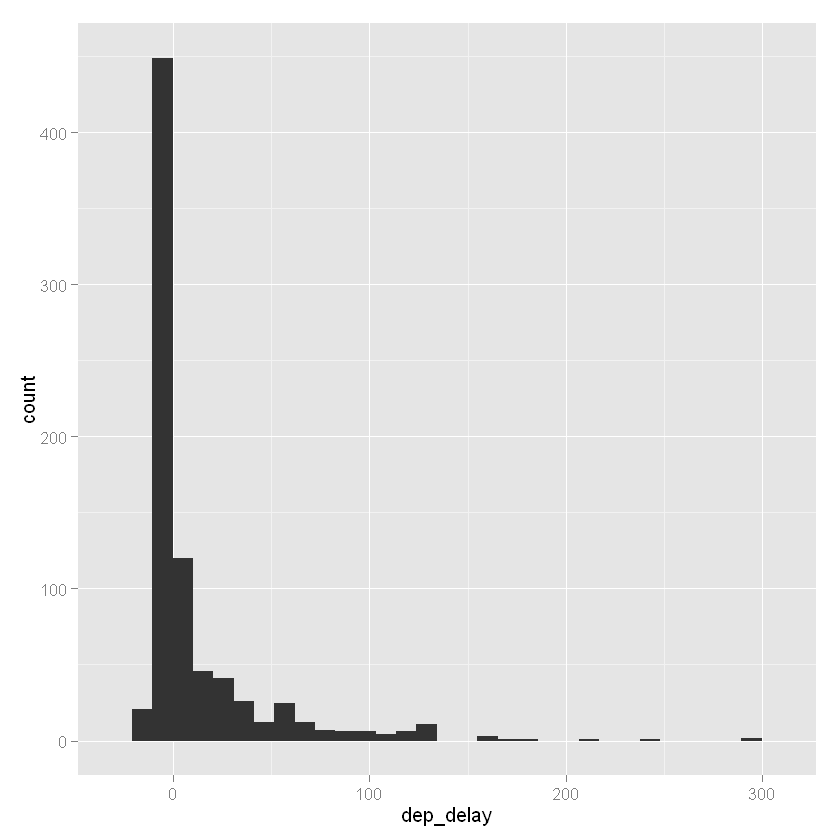

In [3]:
rdu_flights <- nycflights %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()

We can also filter based on multiple criteria. Suppose we are interested in flights headed to San Francisco (SFO) in February:

Note that we can separate the conditions using commas if we want flights that are both headed to SFO **and** in February. If we are interested in either
flights headed to SFO **or** in February we can use the `|` instead of the comma.

In [4]:
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)

In [5]:
head(sfo_feb_flights)

Source: local data frame [6 x 16]

  year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1 2013     2  18     1527        57     1903        48      DL  N711ZX   1322
2 2013     2   3      613        14     1008        38      UA  N502UA    691
3 2013     2  15      955        -5     1313       -28      DL  N717TW   1765
4 2013     2  18     1928        15     2239        -6      UA  N24212   1214
5 2013     2  24     1340         2     1644       -21      UA  N76269   1111
6 2013     2  25     1415       -10     1737       -13      UA  N532UA    394
Variables not shown: origin (chr), dest (chr), air_time (dbl), distance (dbl),
  hour (dbl), minute (dbl)

### Summarise


Note that in the `summarise` function we created a list of two elements. The 
names of these elements are user defined, like `mean_dd`, `sd_dd`, `n`, and 
you could customize these names as you like (just don't use spaces in your 
names). Calculating these summary statistics also require that you know the 
function calls. Note that `n()` reports the sample size.


**Summary statistics: ** Some useful function calls for summary statistics for a 
single numerical variable are as follows:

- `mean`
- `median`
- `sd`
- `var`
- `IQR`
- `range`
- `min`
- `max`

In [6]:
sfo_feb_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n(), IQR_dd=IQR(dep_delay))

Source: local data frame [1 x 4]

  mean_dd    sd_dd  n IQR_dd
1    10.5 33.27968 68     14

Another useful functionality is being able to quickly calculate summary statistics for various groups in your data frame. For example, we can modify the 
above command using the `group_by` function to get the same summary stats for each origin airport:

In [7]:
sfo_feb_flights %>%
  group_by(origin) %>%
  summarise(mean_ad = mean(arr_delay), median_ad=median(arr_delay),sd_ad = sd(arr_delay), IQR_ad=IQR(arr_delay),n = n())

Source: local data frame [2 x 6]

  origin    mean_ad median_ad    sd_ad IQR_ad  n
1    EWR -15.125000     -15.5 13.82996  17.50  8
2    JFK  -3.083333     -10.5 38.14081  22.75 60

In [8]:
sfo_feb_flights %>%
  group_by(carrier) %>%
  summarise(mean_ad = mean(arr_delay), median_ad=median(arr_delay),sd_ad = sd(arr_delay), IQR_ad=IQR(arr_delay),n = n())

Source: local data frame [5 x 6]

  carrier    mean_ad median_ad    sd_ad IQR_ad  n
1      AA  11.500000       5.0 29.47032  17.50 10
2      B6  -6.333333     -10.5 10.98484  12.25  6
3      DL -13.473684     -15.0 22.02869  22.00 19
4      UA   1.809524     -10.0 48.32662  22.00 21
5      VX -13.750000     -22.5 40.84811  21.25 12

Which month would you expect to have the highest average delay departing 
from an NYC airport?

Let's think about how we would answer this question:

- First, calculate monthly averages for departure delays. With the new language
we are learning, we need to
    + `group_by` months, then
    + `summarise` mean departure delays.
- Then, we need to `arrange` these average delays in `desc`ending order

In [9]:
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay)) %>%
  arrange(desc(mean_dd))

Source: local data frame [12 x 2]

   month   mean_dd
1      7 20.754559
2      6 20.350293
3     12 17.368189
4      4 14.554477
5      3 13.517602
6      5 13.264800
7      8 12.619097
8      2 10.687227
9      1 10.233333
10     9  6.872436
11    11  6.103183
12    10  5.880374

In [10]:
nycflights %>%
  group_by(month) %>%
  summarise(median_dd = median(dep_delay)) %>%
  arrange(desc(median_dd))

Source: local data frame [12 x 2]

   month median_dd
1     12         1
2      6         0
3      7         0
4      3        -1
5      5        -1
6      8        -1
7      1        -2
8      2        -2
9      4        -2
10    11        -2
11     9        -3
12    10        -3

We can also visualize the distributions of departure delays across months using 
side-by-side box plots:

There is some new syntax here: We want departure delays on the y-axis and the
months on the x-axis to produce side-by-side box plots. Side-by-side box plots
require a categorical variable on the x-axis, however in the data frame `month` is 
stored as a numerical variable (numbers 1 - 12). Therefore we can force R to treat
this variable as categorical, what R calls a **factor**, variable with 
`factor(month)`.

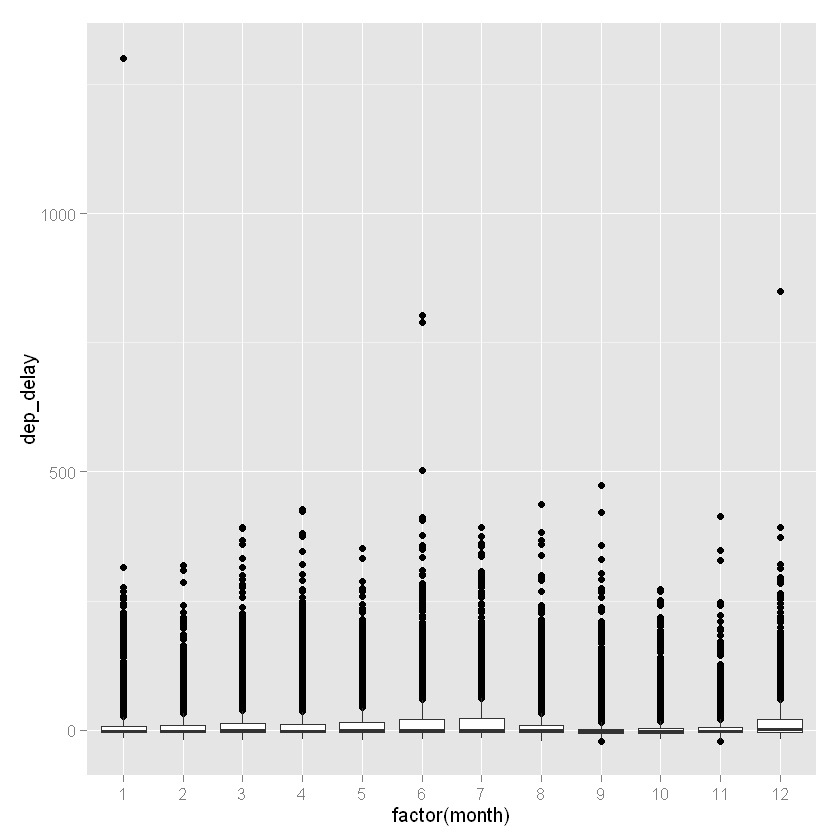

In [11]:
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()

### Mutate

Suppose you will be flying out of NYC and want to know which of the 
three major NYC airports has the best on time departure rate of departing flights. 
Suppose also that for you a flight that is delayed for less than 5 minutes is 
basically "on time". You consider any flight delayed for 5 minutes of more to be 
"delayed".

In order to determine which airport has the best on time departure rate, 
we need to 

- first classify each flight as "on time" or "delayed",
- then group flights by origin airport,
- then calculate on time departure rates for each origin airport,
- and finally arrange the airports in descending order for on time departure
percentage.

Let's start with classifying each flight as "on time" or "delayed" by
creating a new variable with the `mutate` function.


In [12]:
nycflights <- nycflights %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))

The first argument in the `mutate` function is the name of the new variable
we want to create, in this case `dep_type`. Then if `dep_delay < 5` we classify 
the flight as `"on time"` and `"delayed"` if not, i.e. if the flight is delayed 
for 5 or more minutes.

Note that we are also overwriting the `nycflights` data frame with the new 
version of this data frame that includes the new `dep_type` variable.

We can handle all the remaining steps in one code chunk:

In [13]:
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
  arrange(desc(ot_dep_rate))

Source: local data frame [3 x 2]

  origin ot_dep_rate
1    LGA   0.7279229
2    JFK   0.6935854
3    EWR   0.6369892

We can also visualize the distribution of on on time departure rate across 
the three airports using a segmented bar plot.

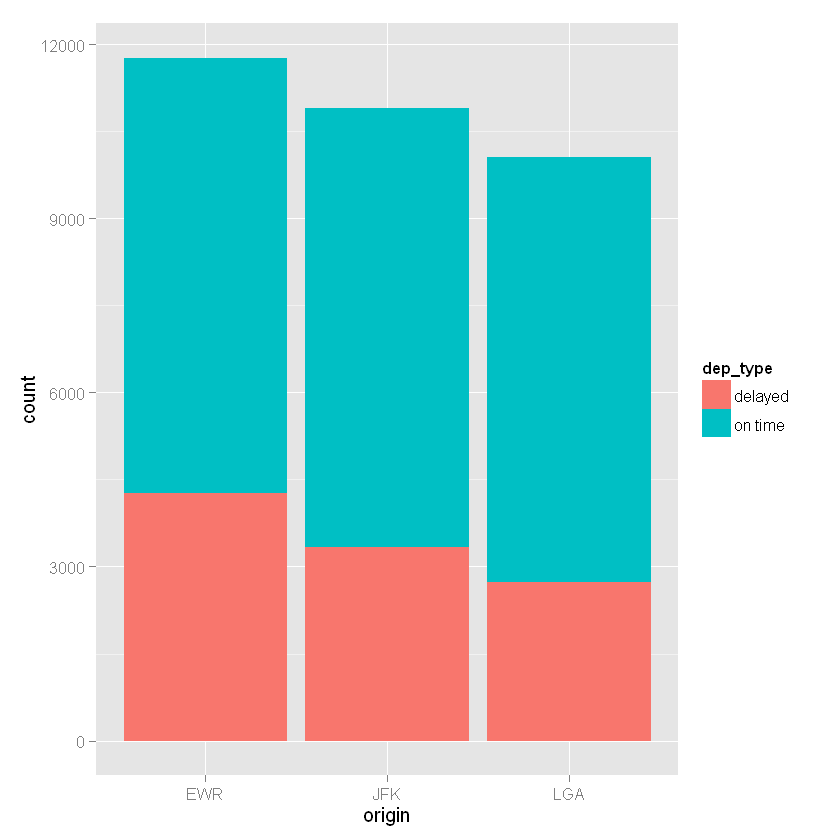

In [14]:
ggplot(data = nycflights, aes(x = origin, fill = dep_type)) +
  geom_bar()

Mutate the data frame so that it includes a new variable that contains the 
average speed, `avg_speed` traveled by the plane for each flight (in mph). What is 
the tail number of the plane with the fastest `avg_speed`? **Hint:** Average speed 
can be calculated as distance divided by number of hours of travel, and note that 
`air_time` is given in minutes. If you just want to show the `avg_speed` and 
`tailnum` and none of the other variables, use the select function at the end of your 
pipe to select just these two variables with `select(avg_speed, tailnum)`. You can 
Google this tail number to find out more about the aircraft. 

In [16]:
nycflights <- nycflights %>%
  mutate(avg_speed = distance /(air_time/60))

In [27]:
maxflight <- nycflights %>%
    select (max(avg_speed))

In [28]:
maxflight

Source: local data frame [32,735 x 1]

   avg_speed
1   474.4409
2   443.8889
3   394.9468
4   446.6667
5   355.2000
6   318.6957
7   352.7500
8   285.0000
9   444.3243
10  447.2727
..       ...

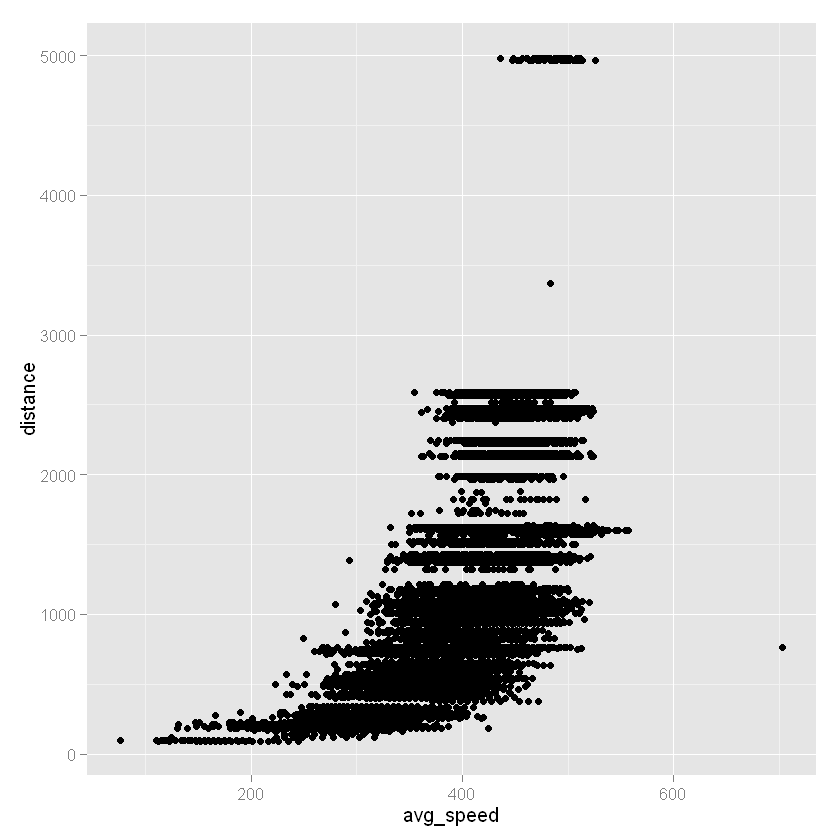

In [20]:
ggplot(nycflights, aes(x = avg_speed, y = distance)) +
  geom_point()

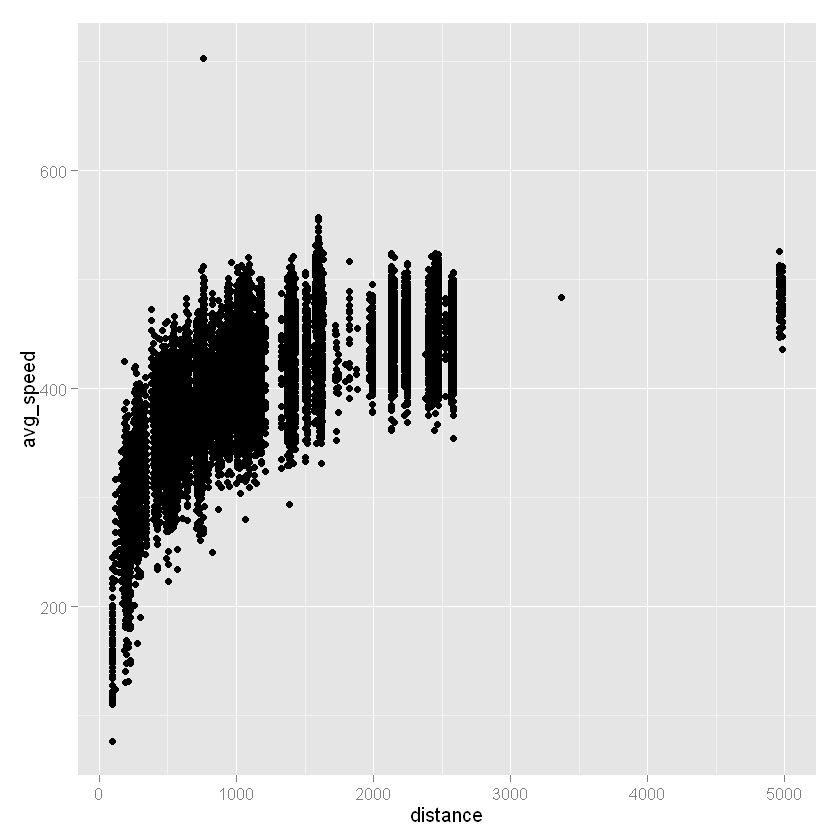

In [21]:
ggplot(nycflights, aes(x = distance, y = avg_speed)) +
  geom_point()

In [22]:
nycflights <- nycflights %>%
  mutate(arr_type = ifelse(arr_delay <=0, "on time", "delayed"))

In [24]:
nycflights %>%
  group_by(dep_type) %>%
  summarise(ot_arr_rate = sum(arr_type == "on time") / n()) %>%
  arrange(desc(ot_arr_rate))

Source: local data frame [2 x 2]

  dep_type ot_arr_rate
1  on time   0.7762241
2  delayed   0.1833639